In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_pickle('feature_engineering_and_selection.pkl')

In [3]:
data

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,...,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
0,32,10,3,4,55,3,2,4,1,0,...,0,1,0,0,0,0,0,0,0,1
1,47,14,4,4,42,3,2,1,2,0,...,0,1,0,0,0,0,0,0,0,1
2,40,5,4,4,48,2,3,1,5,1,...,0,1,0,0,0,0,0,0,1,0
3,41,10,4,2,73,2,5,4,3,0,...,0,0,0,0,0,0,0,0,0,1
4,60,16,4,1,84,3,2,1,8,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,4,71,4,2,4,1,1,...,0,1,0,0,0,0,0,0,1,0
1196,37,10,2,4,80,4,1,4,3,0,...,0,0,0,1,0,0,0,0,0,1
1197,50,28,1,4,74,4,1,3,1,1,...,0,0,0,1,0,0,0,0,0,1
1198,34,9,3,4,46,2,3,2,1,0,...,0,0,0,0,0,0,0,0,0,1


Department-wise Performance Ratings:
                        AveragePerformance
Development                       3.085873
Data Science                      3.050000
Human Resources                   2.925926
Research & Development            2.921283
Sales                             2.860590
Finance                           2.775510


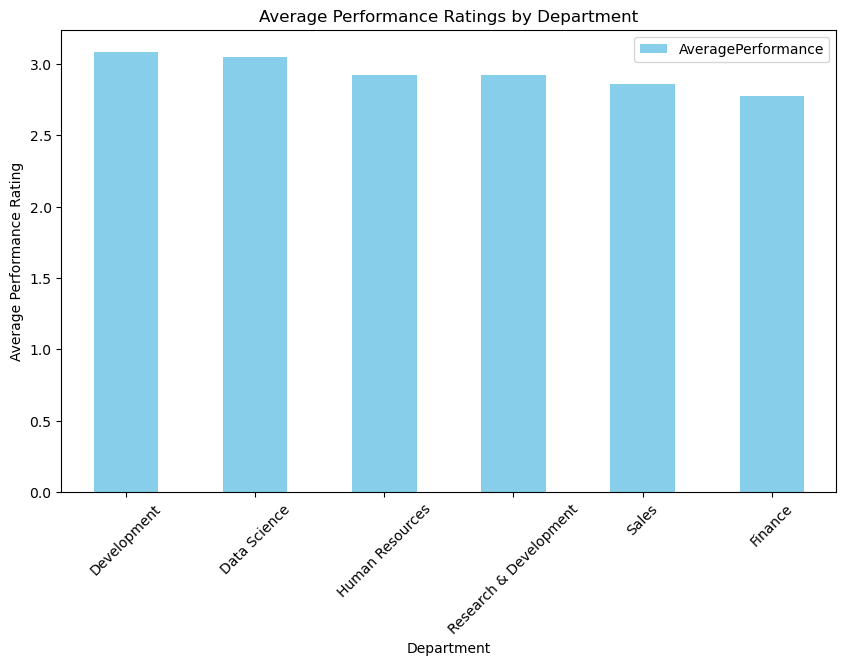

In [4]:
department_columns = [col for col in data.columns if col.startswith('EmpDepartment_')]

department_performance = {}

for col in department_columns:
    department_name = col.replace('EmpDepartment_', '') 
    avg_performance = data.loc[data[col] == 1, 'PerformanceRating'].mean()
    department_performance[department_name] = avg_performance

department_performance_df = pd.DataFrame.from_dict(department_performance, orient='index', columns=['AveragePerformance']).sort_values(by='AveragePerformance', ascending=False)

print("Department-wise Performance Ratings:")
print(department_performance_df)

department_performance_df.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Performance Ratings by Department')
plt.xlabel('Department')
plt.ylabel('Average Performance Rating')
plt.xticks(rotation=45)
plt.show()

In [5]:
data = pd.read_pickle('train.pkl')

Top 3 Important Factors Affecting Employee Performance:
                       Feature  Importance
7  Performance_WorkLifeBalance    0.444078
6           EmpWorkLifeBalance    0.215005
5     EmpLastSalaryHikePercent    0.181135


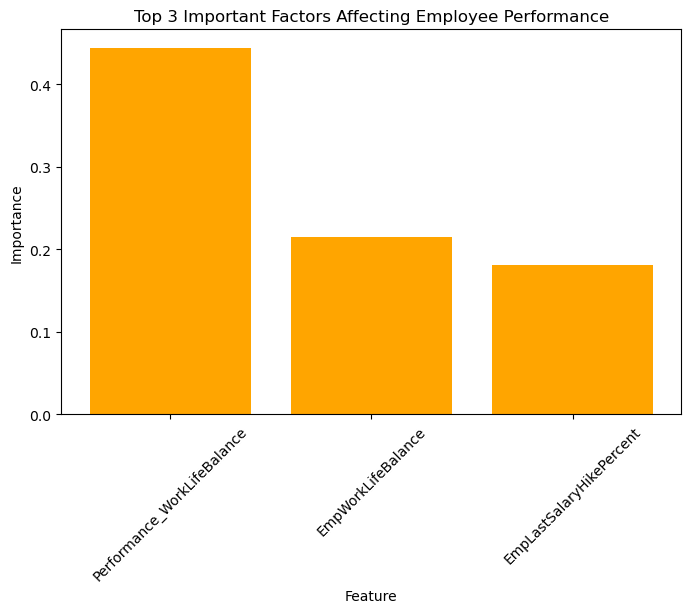


Recommendations for Improvement Based on Analysis:
- Performance_WorkLifeBalance: Introduce flexible work hours, remote working options, and wellness programs.
- EmpWorkLifeBalance: Conduct regular surveys to understand employee concerns and address them proactively.
- EmpLastSalaryHikePercent: Align salary hikes with industry standards and employee expectations to boost morale.


In [6]:
X = data.drop(columns=['PerformanceRating']) 
y = data['PerformanceRating'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_3_features = feature_importances.head(3)
print("Top 3 Important Factors Affecting Employee Performance:")
print(top_3_features)
plt.figure(figsize=(8, 5))
plt.bar(top_3_features['Feature'], top_3_features['Importance'], color='orange')
plt.title('Top 3 Important Factors Affecting Employee Performance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


recommendations = {
    top_3_features.iloc[0]['Feature']: "Introduce flexible work hours, remote working options, and wellness programs.",
    top_3_features.iloc[1]['Feature']: "Conduct regular surveys to understand employee concerns and address them proactively.",
    top_3_features.iloc[2]['Feature']: "Align salary hikes with industry standards and employee expectations to boost morale."
}

print("\nRecommendations for Improvement Based on Analysis:")
for feature, recommendation in recommendations.items():
    print(f"- {feature}: {recommendation}")


### A trained model which can predict the employee performance based on factors as inputs

In [7]:
new_candidate = {
    'EmpEducationLevel': 2,
    'EmpEnvironmentSatisfaction': 3,
    'EmpJobSatisfaction': 4,
    'NumCompaniesWorked': 2,
    'OverTime': 1,  
    'EmpLastSalaryHikePercent': 15,
    'EmpWorkLifeBalance': 3,
    'Performance_WorkLifeBalance': 0.5,  
    'Gender_Female': 0, 
    'EducationBackground_Human Resources': 0,
    'EducationBackground_Life Sciences': 1,
    'EducationBackground_Other': 0,
    'MaritalStatus_Divorced': 0,
    'MaritalStatus_Single': 1,
    'EmpDepartment_Data Science': 0,
    'EmpDepartment_Development': 1,
    'EmpJobRole_Business Analyst': 0,
    'EmpJobRole_Data Scientist': 0,
    'EmpJobRole_Delivery Manager': 0,
    'EmpJobRole_Developer': 1,
    'EmpJobRole_Manager': 0,
    'EmpJobRole_Manufacturing Director': 0,
    'EmpJobRole_Research Scientist': 0,
    'EmpJobRole_Senior Developer': 0,
    'EmpJobRole_Technical Architect': 0,
    'EmpJobRole_Technical Lead': 0,
    'BusinessTravelFrequency_Non-Travel': 0,
    'BusinessTravelFrequency_Travel_Frequently': 1
}

new_candidate_df = pd.DataFrame([new_candidate])
predicted_performance = gb_model.predict(new_candidate_df)
print("Predicted Performance Rating:", predicted_performance[0])


Predicted Performance Rating: 2
